# Dinámica del Amor

Se modela el estado emotivo de dos amantes, al paso del tiempo.

<table>
    <tr>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Altichiero%2C_ritratto_di_Francesco_Petrarca.jpg/192px-Altichiero%2C_ritratto_di_Francesco_Petrarca.jpg" />
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Francesco_Petrarca01.jpg/200px-Francesco_Petrarca01.jpg" />
        </td>
    </tr>
</table>

In [1]:
# Para hacer experimentos numéricos importamos numpy
import numpy as np
import pandas as pd

# y biblioteca para plotear
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# cómputo simbólico con sympy
from sympy import *
init_printing()

## Tasa de cambio del estado emotivo de Laura

$\frac{dL(t)}{dt}=-\alpha_{1}L(t)+R_{L}(P(t))+\beta_{1}A_{P}$

## Tasa de cambio del estado emotivo de Petrarca
$\frac{dP(t)}{dt}=-\alpha_{2}L(t)+R_{p}(L(t))+\beta_{2}\frac{A_{L}}{1+\delta Z(t)}$

## Tasa de cambio de la inspiración del Poeta
$\frac{dZ(t)}{dt}=-\alpha_{3}Z(t)+\beta_{3}P(t)$

## Reacción del Poeta a Laura
$R_{P}(L)=\gamma_{2}L$

## Reacción de la Bella al Poeta
$R_{L}(P)=\beta_{1}P\left(1-\left(\frac{P}{\gamma}\right)^{2}\right)$

In [80]:
def dlaura(alpha1, beta1, gamma, atractivo_petrarca):
    def dl(t):
        return -alpha1 * L[t] + beta1 * ((P[t] / (1-(P[t]/gamma)**2))+atractivo_petrarca)
    return dl

def dpetrarca(alpha2, beta2, delta, atractivo_laura):
    def dp(t):
        return -alpha2*P[t] + beta2*(L[t]+atractivo_laura/(1+delta*Z[t]))
    return dp

def dinspiracion_petrarca(alpha3, beta3):
    def dz(t):
        return -alpha3*Z[t] + beta3*P[t]
    return dz

$\alpha_{1}>\alpha_{2}>\alpha_{3}$

In [81]:
alpha1 = 4.6
alpha2 = 1.2
alpha3 = 0.12

beta1 = 1
beta2 = 6
beta3 = -3

gamma = 1
delta = 1

atractivo_petrarca = -1
atractivo_laura = 2

dl = dlaura(alpha1, beta1, gamma, atractivo_petrarca)
dp = dpetrarca(alpha2, beta2, delta, atractivo_laura)
dz = dinspiracion_petrarca(alpha3, beta3)

In [4]:

#def dl(t):
#    return -3.6*L[t] + 1.2*P[t]/(1 - P[t]**2)

#def dp(t):
#    return -1.2*L[t] + 6 * L[t] + 12 / (1 + Z[t])

#def dz(t):
#    return -0.12 * Z[t] + 12 * P[t]

In [84]:
years = 20
dt = 0.4
steps = int(years / dt)

L = np.zeros(steps)
P = np.zeros(steps)
Z = np.zeros(steps)


for t in range(steps-1):
    # print(t,dl(t),dp(t),dz(t))
    L[t+1] = L[t] + dt*dl(t)
    P[t+1] = P[t] + dt*dp(t)
    Z[t+1] = Z[t] + dt*dz(t)

In [6]:
#f = pd.DataFrame()
#pd.DataFrame({'P': P.tolist(), 'Z': Z.tolist(), 'L': L.tolist()})

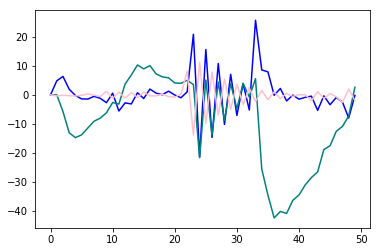

In [85]:
plt.plot(range(steps), P, color='blue')
plt.plot(range(steps), Z, color='teal')
plt.plot(range(steps), L, color='pink')